# Project: Online Retail Exploratory Data Analysis with Python

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

### Laoding the data

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
df = pd.read_csv("Online Retail.csv")

#### Displaying first four rows of the dataframe

In [134]:
df.head(4)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


### Data Cleaning

#### Checking the datatypes and number of null values of all the features

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### Observations
- The features are in correct format except for CustomerID which should be of object type only


#### Converting CustomerID to str type

In [136]:
df['CustomerID'] = df['CustomerID'].astype('str')

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   541909 non-null  object 
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 33.1+ MB


#### Observation
- CustomerID converted to object type

#### Checking for duplicate values

In [138]:
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,01-12-2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,01-12-2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,01-12-2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,01-12-2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,01-12-2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,09-12-2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,09-12-2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,09-12-2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,09-12-2011 11:34,2.10,14446.0,United Kingdom


In [139]:
df.duplicated().sum()

5268

#### Observations
-There are a total of 5268 duplicate values which if not removed would generate biased analysis

#### Dropping the duplicate values

In [140]:
df.drop_duplicates(inplace=True)

In [141]:
df.duplicated().sum()


0

#### Observations
-All the duplicate values have been removed

#### Checking for null values against each column

In [142]:
df.isnull().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

#### Observation
- There are a total of 1454 null values against descripton
- Description contains details of the product bought and would not make much contribution to the analysis
- For the sake of completion, we can impute these values with mode or with different random values(from already accepted values)

#### Before imputing null values, let us check for any bad entry in the quantity and UnitPrice column

In [143]:
df[df['Quantity']<1]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,01-12-2010 09:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,01-12-2010 09:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,01-12-2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,09-12-2011 09:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,09-12-2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,09-12-2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,09-12-2011 11:58,1.25,17315.0,United Kingdom


#### Observations
- Negative number in qunatities are anomalous and probably indicate returns
- Dropping such observations from the dataframe and let us store them as return_df if any analysis on returns is to be done 

In [144]:
df_return = df[df['Quantity']<1]

In [145]:
df_return

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,01-12-2010 09:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,01-12-2010 09:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,01-12-2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,09-12-2011 09:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,09-12-2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,09-12-2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,09-12-2011 11:58,1.25,17315.0,United Kingdom


In [146]:
df.drop(df[df['Quantity']<1].index, inplace=True)

In [147]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


#### Checking for products whose Unit Price is 0 or less than 0

In [148]:
df[df['UnitPrice']<=0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,01-12-2010 11:52,0.0,nan,United Kingdom
1970,536545,21134,NaN,1,01-12-2010 14:32,0.0,nan,United Kingdom
1971,536546,22145,NaN,1,01-12-2010 14:33,0.0,nan,United Kingdom
1972,536547,37509,NaN,1,01-12-2010 14:33,0.0,nan,United Kingdom
1987,536549,85226A,NaN,1,01-12-2010 14:34,0.0,nan,United Kingdom
...,...,...,...,...,...,...,...,...
535334,581211,22142,check,14,07-12-2011 18:36,0.0,nan,United Kingdom
536981,581234,72817,NaN,27,08-12-2011 10:33,0.0,nan,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,08-12-2011 13:58,0.0,nan,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,08-12-2011 13:58,0.0,nan,United Kingdom


#### Observations
- These 1176 values probably represent items offered as free of cost with some other product or as samples
- A knowledge about the products which these items were offered free of cost might would have been helpful to identify increase in sales of thise products
- But no such information is available in the given dataset

#### Dropping all such values

In [149]:
df.drop(df[df['UnitPrice']<=0].index, inplace = True)

In [150]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


#### Now checking for null values

In [151]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

#### Observations
- As can be seen, the dataframe does not contain any null values now and is ready for analysis

#### The InvoiceNo and StockCode would not be of any help for the analysis and as such can be dropped

In [152]:
df.drop(['InvoiceNo','StockCode'],axis=1, inplace=True)

#### Resetting the index

In [153]:
df.reset_index(drop=True, inplace=True)

#### Adding a new feature of sales as Quantity*UnitPrice

In [154]:
df['Sales']= df['Quantity']* df['UnitPrice']

### Summary statistics of quantity and unit price

In [155]:
df.describe()

,Quantity,UnitPrice,Sales
count,524878.000000,524878.000000,524878.000000
mean,10.616600,3.922573,20.275399
std,156.280031,36.093028,271.693566
min,1.000000,0.001000,0.001000
25%,1.000000,1.250000,3.900000
50%,4.000000,2.080000,9.920000
75%,11.000000,4.130000,17.700000
max,80995.000000,13541.330000,168469.600000


#### Observations
- Average order quantitiy is 10.6
- Average unit price is 3.9

In [156]:
df

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...
524873,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France,10.20
524874,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France,12.60
524875,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France,16.60
524876,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France,16.60


### Creating Visualizations

In [157]:
country_sales=df.groupby('Country')[['Sales','Quantity']].sum().reset_index().sort_values(by='Sales',ascending=False)

In [158]:
country_sales

,Country,Sales,Quantity
36,United Kingdom,9001744.094,4646906
24,Netherlands,285446.340,200361
10,EIRE,283140.520,147007
14,Germany,228678.400,119154
13,France,209625.370,112060
0,Australia,138453.810,83891
31,Spain,61558.560,27933
33,Switzerland,57067.600,30617
3,Belgium,41196.340,23237
32,Sweden,38367.830,36078


Visualizing top 10 sales producing countries

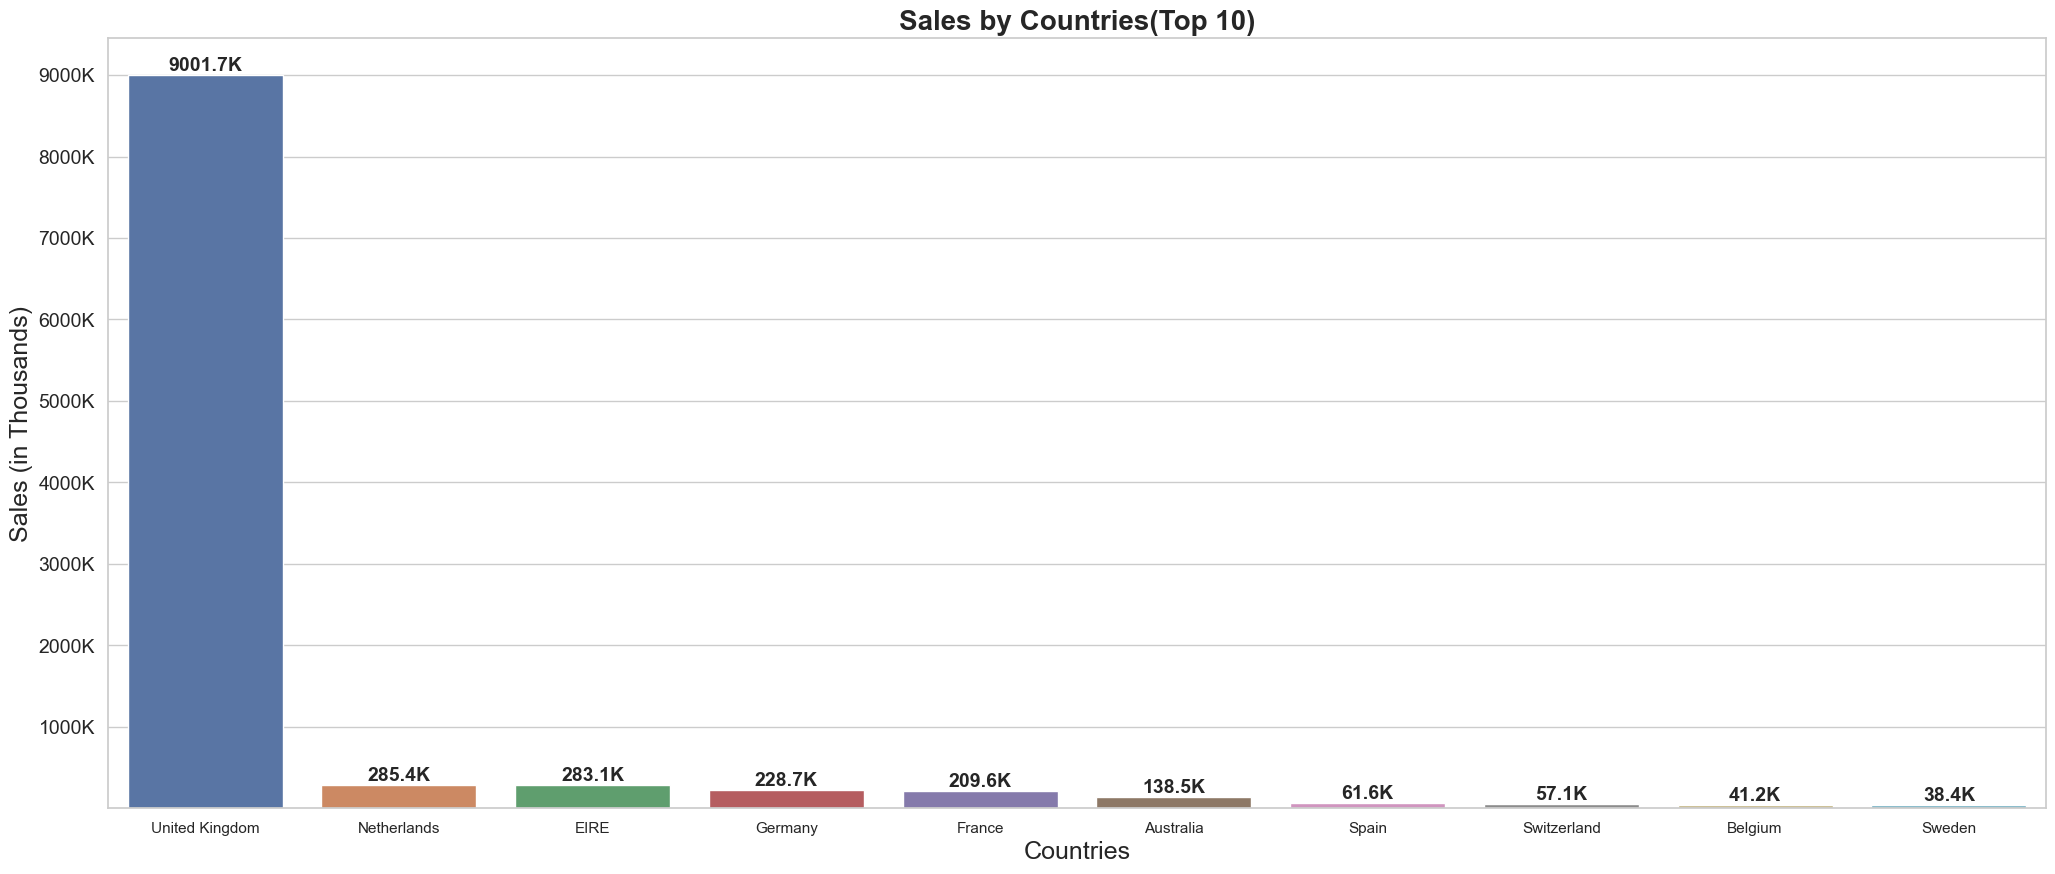

In [159]:
plt.figure(figsize=(25,10))
ax= sns.barplot(data=country_sales.head(10), x='Country',y='Sales')
plt.yticks(np.arange(1000000,10000000,1000000),labels=[f'{int(i/1000)}K' for i in np.arange(1000000,10000000,1000000)],fontsize=14)
plt.title('Sales by Countries(Top 10)', fontsize= 20, fontweight= 'bold')
plt.ylabel('Sales (in Thousands)', fontsize=18)
plt.xlabel('Countries', fontsize=18)
for p in ax.patches:
    value = p.get_height() / 1000  # Divide the height by 1,000 to display in thousands
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{value:.1f}K', ha='center', va='bottom',
            fontsize=14, fontweight='bold')

In [180]:
# #We can also use-
# plt.figure(figsize=(25,10))
# sns.barplot(data=country_sales[:10], x='Country',y='Sales')

### Visualizing country wise sum of sales

#### Observations
- United Kingdom has a sales which is way higher than the rest of them

- The difference in sales of United Kingdom and rest of the countries is so much that it is difficult to visualize sales of other countries
as the bar generated by UK is much higher than rest of them
- To visualize the sales of other countries, United Kingdom is being excluded from the visual

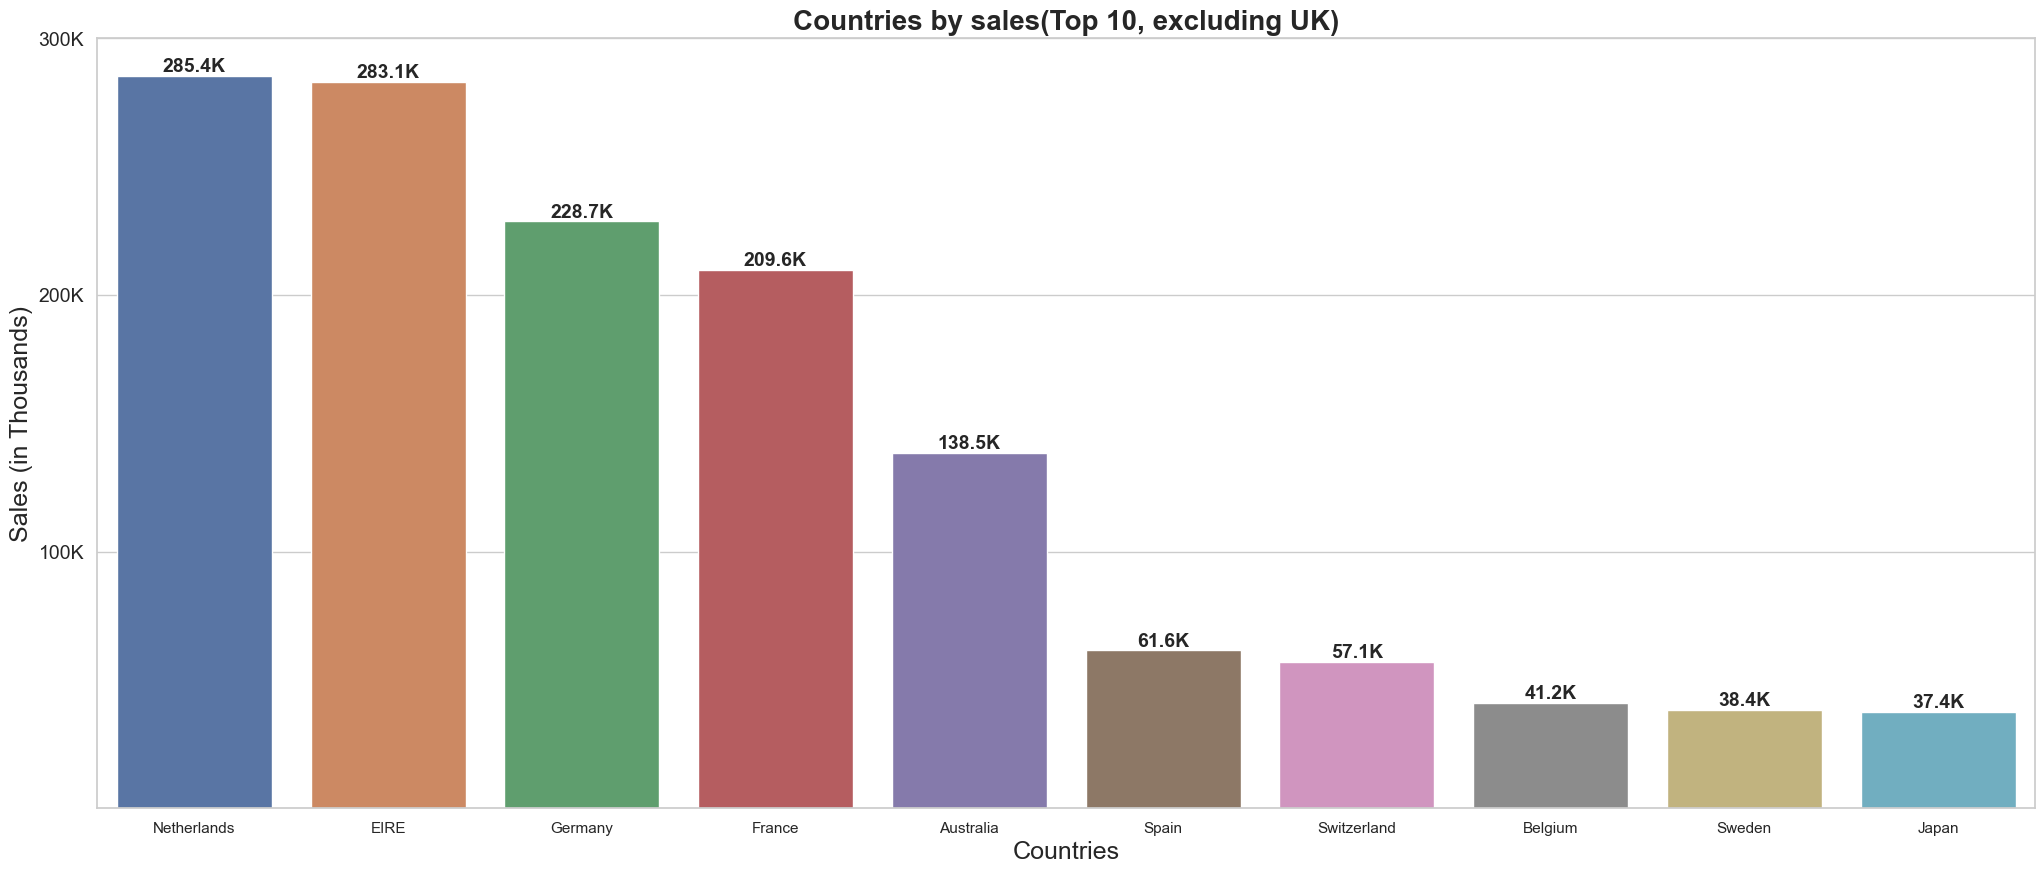

In [161]:
plt.figure(figsize=(25,10))
ax= sns.barplot(data=country_sales[country_sales != 'United Kingdom'].head(11), x='Country', y= 'Sales')
plt.yticks(np.arange(100000,400000,100000),labels=[f'{int(i/1000)}K' for i in np.arange(100000,400000,100000)],fontsize=14)
plt.title('Countries by sales(Top 10, excluding UK)', fontsize= 20, fontweight= 'bold')
plt.ylabel('Sales (in Thousands)', fontsize=18)
plt.xlabel('Countries', fontsize=18)
for p in ax.patches:
    value = p.get_height() / 1000  # Divide the height by 1,000 to display in thousands
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{value:.1f}K', ha='center', va='bottom',
            fontsize=14, fontweight='bold')

#### Observations
- After United Kingdom(which leads by a huge margin), highest sales are provided by Netherlands followed closely by Eire
- Sweden and Japan are at the end of the queue of top 10 sales producing countries

In [162]:
# # We can also use
# plt.figure(figsize=(25,10))
# sns.barplot(data=country_sales[1:11], x='Country', y= 'Sales')

Visualizing least 10 sales producing countries

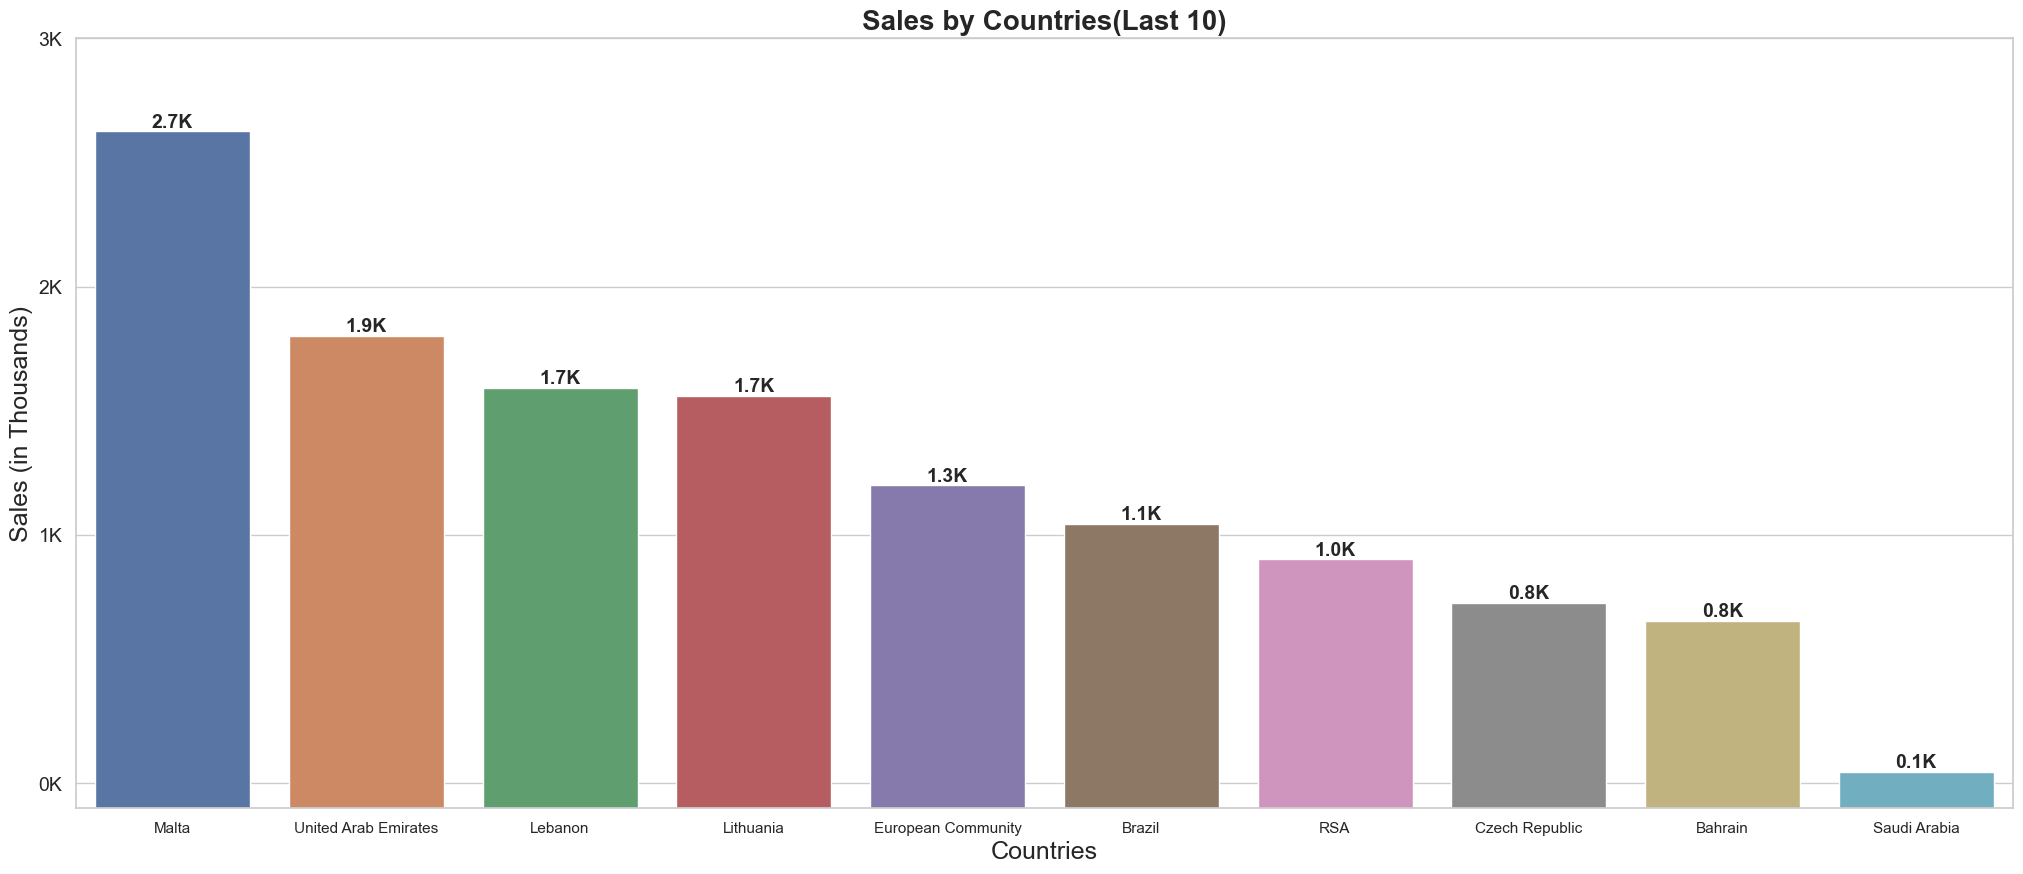

In [163]:
plt.figure(figsize=(25,10))
ax= sns.barplot(data=country_sales.tail(10), x='Country',y='Sales')
plt.yticks(np.arange(100,4000,1000),labels=[f'{int(i/1000)}K' for i in np.arange(100,4000,1000)],fontsize=14)
plt.title('Sales by Countries(Last 10)', fontsize= 20, fontweight= 'bold')
plt.ylabel('Sales (in Thousands)', fontsize=18)
plt.xlabel('Countries', fontsize=18)
for p in ax.patches:
    value = p.get_height() / 1000  # Divide the height by 1,000 to display in thousands
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{value:.1f}K', ha='center', va='bottom',
            fontsize=14, fontweight='bold')

#### Observations-
- Bahrain and Saudi Arabia are the countries contributing least to the sales

Top 10 countries by Quantity sold (excluding UK)

In [164]:
country_quantity= df.groupby('Country')['Quantity'].sum().sort_values(ascending=False).reset_index()

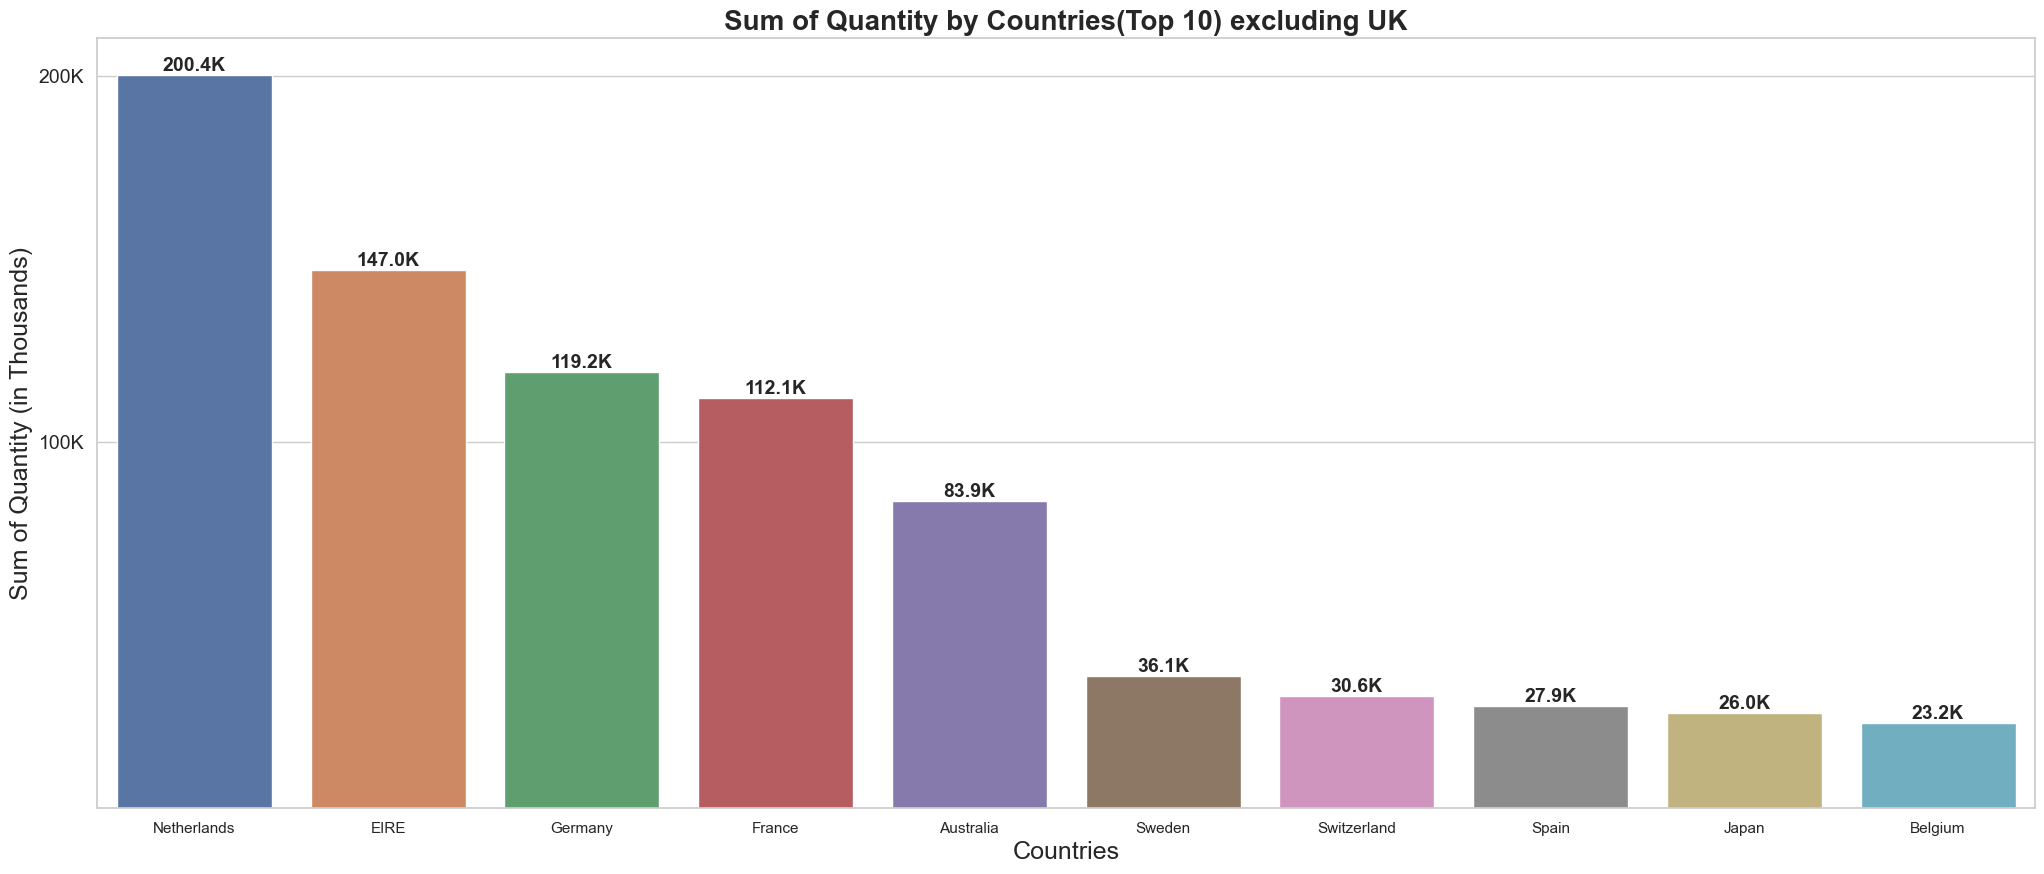

In [165]:
plt.figure(figsize=(25,10))
ax= sns.barplot(data=country_quantity[country_quantity != 'United Kingdom'].head(11), x='Country', y= 'Quantity')
plt.yticks(np.arange(100000,300000,100000),labels=[f'{int(i/1000)}K' for i in np.arange(100000,300000,100000)],fontsize=14)
plt.title('Sum of Quantity by Countries(Top 10) excluding UK', fontsize= 20, fontweight= 'bold')
plt.ylabel('Sum of Quantity (in Thousands)', fontsize=18)
plt.xlabel('Countries', fontsize=18)
for p in ax.patches:
    value = p.get_height() / 1000  # Divide the height by 1,000 to display in thousands
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{value:.1f}K', ha='center', va='bottom',
            fontsize=14, fontweight='bold')

#### Observations
- For top 10 countries, the order of countries by quantity ordered is almost same as the order by sum of sales(except for a few countries)

Visualising 10 best and 10 worst selling products

In [166]:
df_description= df.groupby('Description')['Sales'].sum().sort_values(ascending=False).reset_index()

In [167]:
df_description

,Description,Sales
0,DOTCOM POSTAGE,206248.770
1,REGENCY CAKESTAND 3 TIER,174156.540
2,"PAPER CRAFT , LITTLE BIRDIE",168469.600
3,WHITE HANGING HEART T-LIGHT HOLDER,106236.720
4,PARTY BUNTING,99445.230
...,...,...
4021,PINK CRYSTAL GUITAR PHONE CHARM,0.850
4022,VINTAGE BLUE TINSEL REEL,0.840
4023,SET 12 COLOURING PENCILS DOILEY,0.650
4024,HEN HOUSE W CHICK IN NEST,0.420


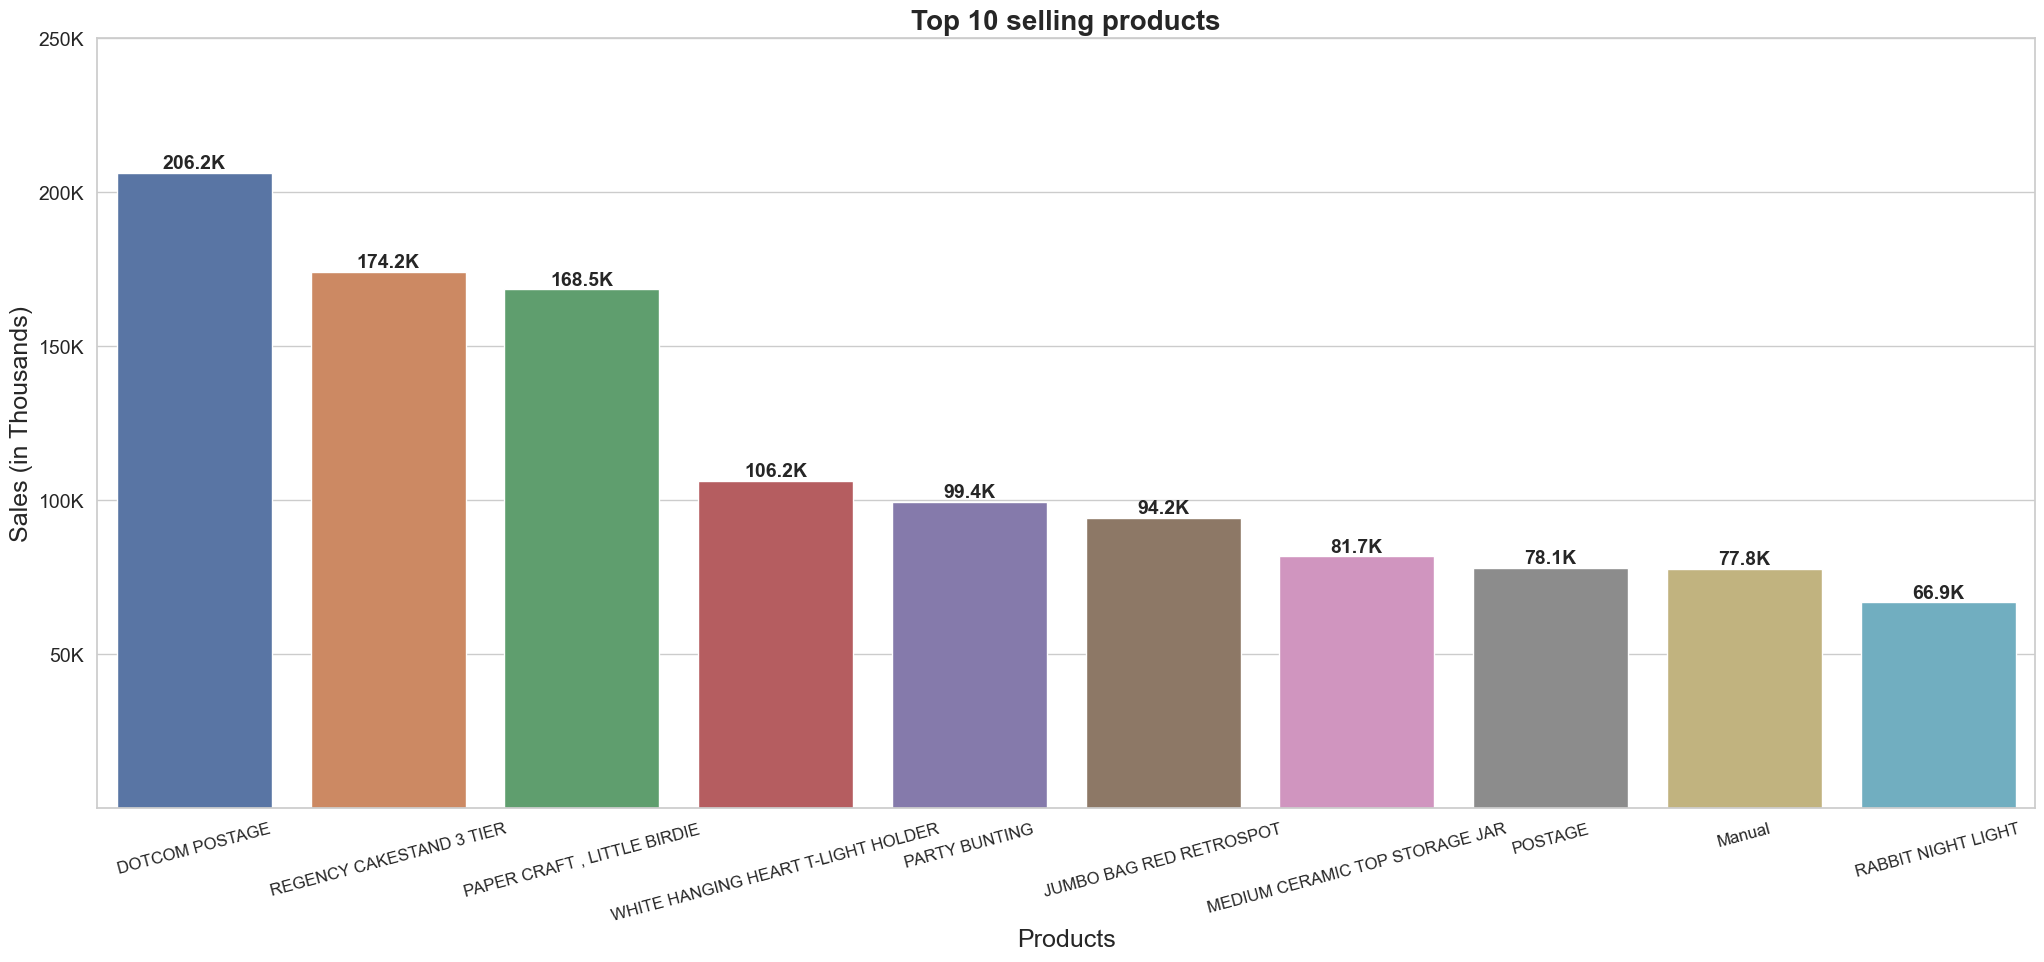

In [168]:
plt.figure(figsize=(25,10))
ax= sns.barplot(data=df_description.head(10), x= 'Description', y= 'Sales')
plt.yticks(np.arange(50000,300000,50000),labels=[f'{int(i/1000)}K' for i in np.arange(50000,300000,50000)],fontsize=14)
plt.xticks(rotation=15, fontsize=12)
plt.title('Top 10 selling products', fontsize= 20, fontweight= 'bold')
plt.ylabel('Sales (in Thousands)', fontsize=18)
plt.xlabel('Products', fontsize=18)
for p in ax.patches:
    value = p.get_height() / 1000  # Divide the height by 1,000 to display in thousands
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{value:.1f}K', ha='center', va='bottom',
            fontsize=14, fontweight='bold')


#### Observations
- Dotcom Postage is the highest selling product sales wise

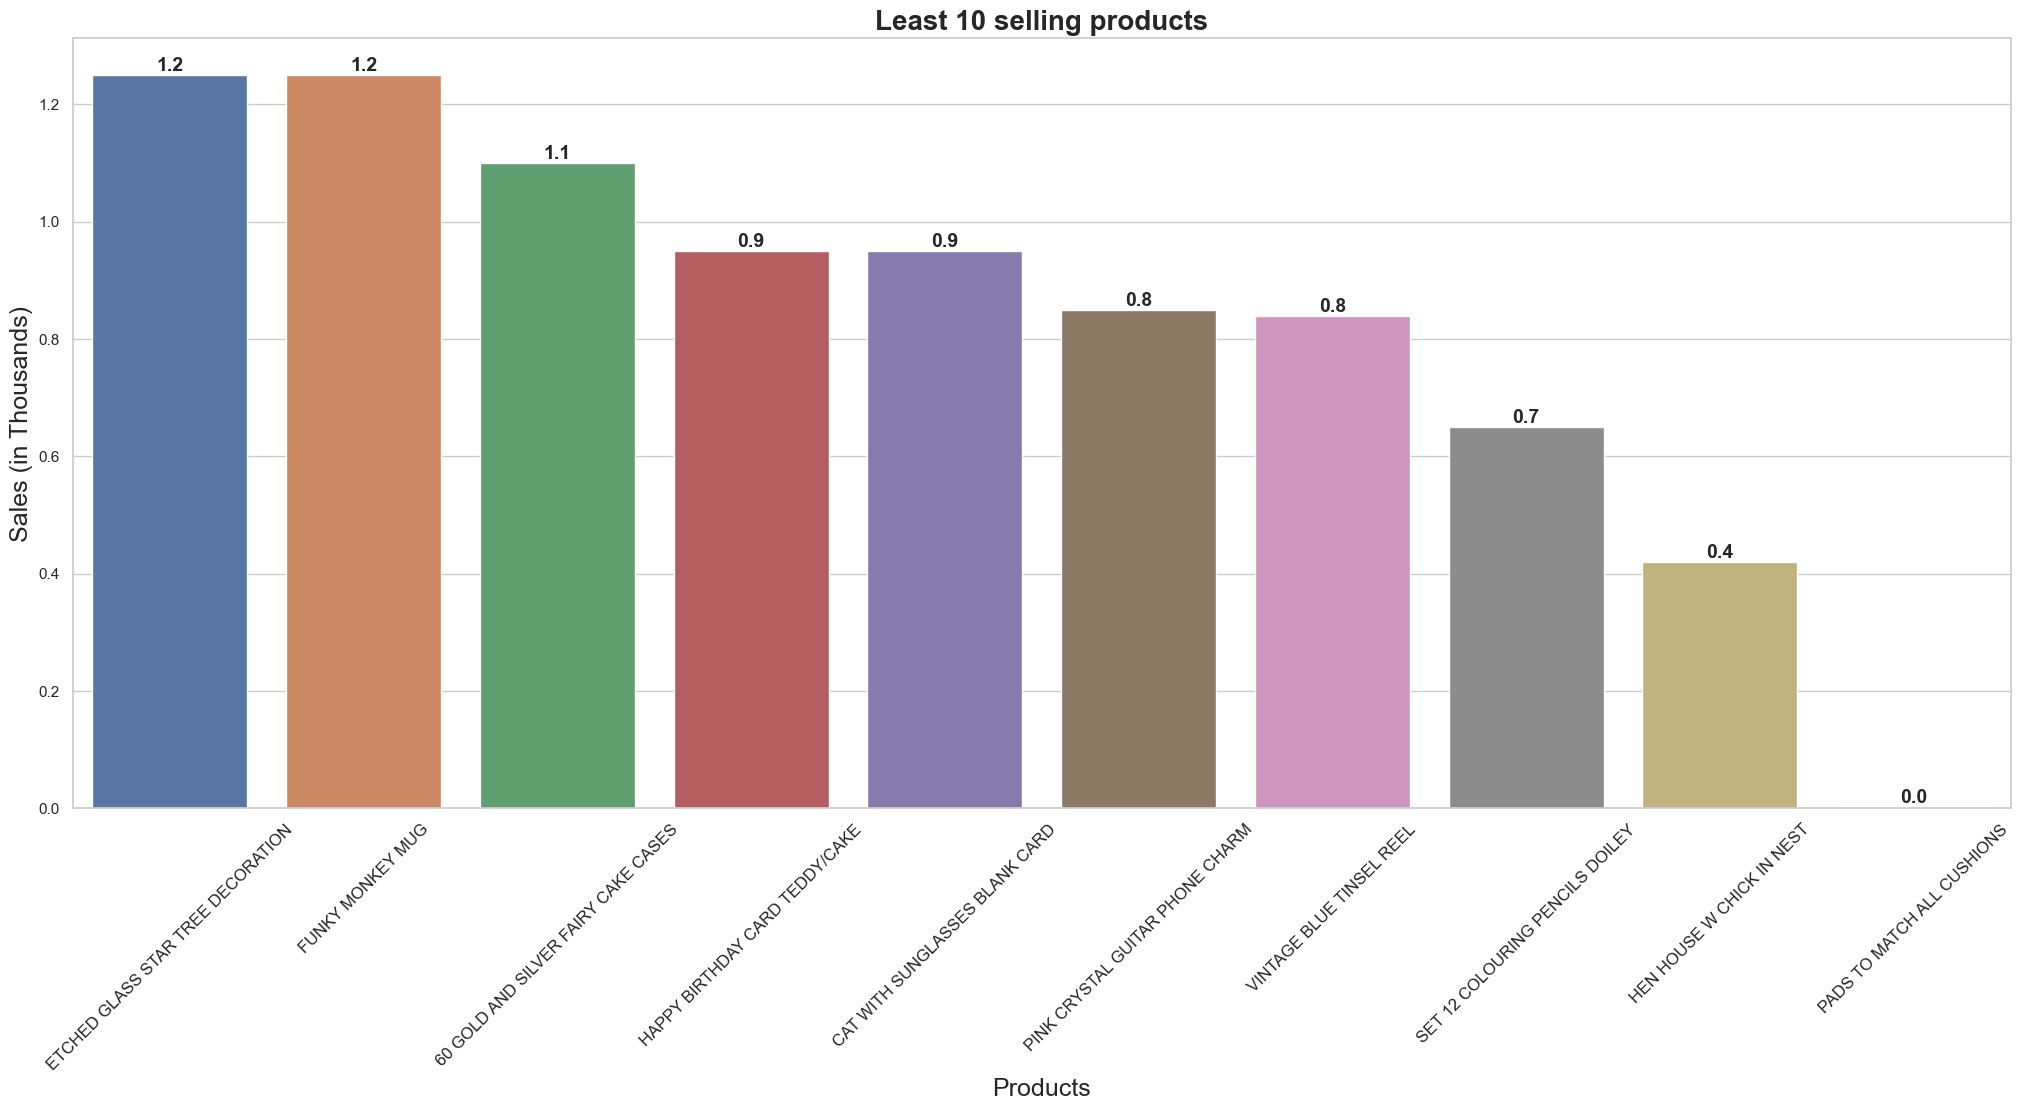

In [187]:
plt.figure(figsize=(25,10))
ax= sns.barplot(data=df_description.tail(10), x= 'Description', y= 'Sales')
plt.xticks(rotation=45, fontsize=12)
plt.title('Least 10 selling products', fontsize= 20, fontweight= 'bold')
plt.ylabel('Sales (in Thousands)', fontsize=18)
plt.xlabel('Products', fontsize=18)
for p in ax.patches:
    #value = p.get_height() / 1000  # Divide the height by 1,000 to display in thousands
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{p.get_height():.1f}', ha='center', va='bottom',
            fontsize=14, fontweight='bold')

#### Observations
- "Hen House" and "Pads to match all cushions" are the worst selling products(sale wise)

### Creating a visualization to observe month wise Sales

In [170]:
# Changing InvoiceDate to date format
df['InvoiceDate']= pd.to_datetime(df['InvoiceDate']).astype('datetime64')

In [171]:
df['InvoiceDate'].dt.month

0         1
1         1
2         1
3         1
4         1
         ..
524873    9
524874    9
524875    9
524876    9
524877    9
Name: InvoiceDate, Length: 524878, dtype: int64

In [172]:
month_df = df.groupby('InvoiceDate')['Sales'].sum().reset_index()

In [173]:
month_df[month_df['InvoiceDate'].dt.year == 2011]

,InvoiceDate,Sales
1430,2011-01-02 08:23:00,312.90
1431,2011-01-02 08:31:00,797.77
1432,2011-01-02 09:01:00,234.47
1433,2011-01-02 09:36:00,409.50
1434,2011-01-02 09:38:00,698.60
...,...,...
18494,2011-12-10 15:49:00,263.61
18495,2011-12-10 16:36:00,2110.05
18496,2011-12-10 16:40:00,1901.92
18497,2011-12-10 17:00:00,620.13


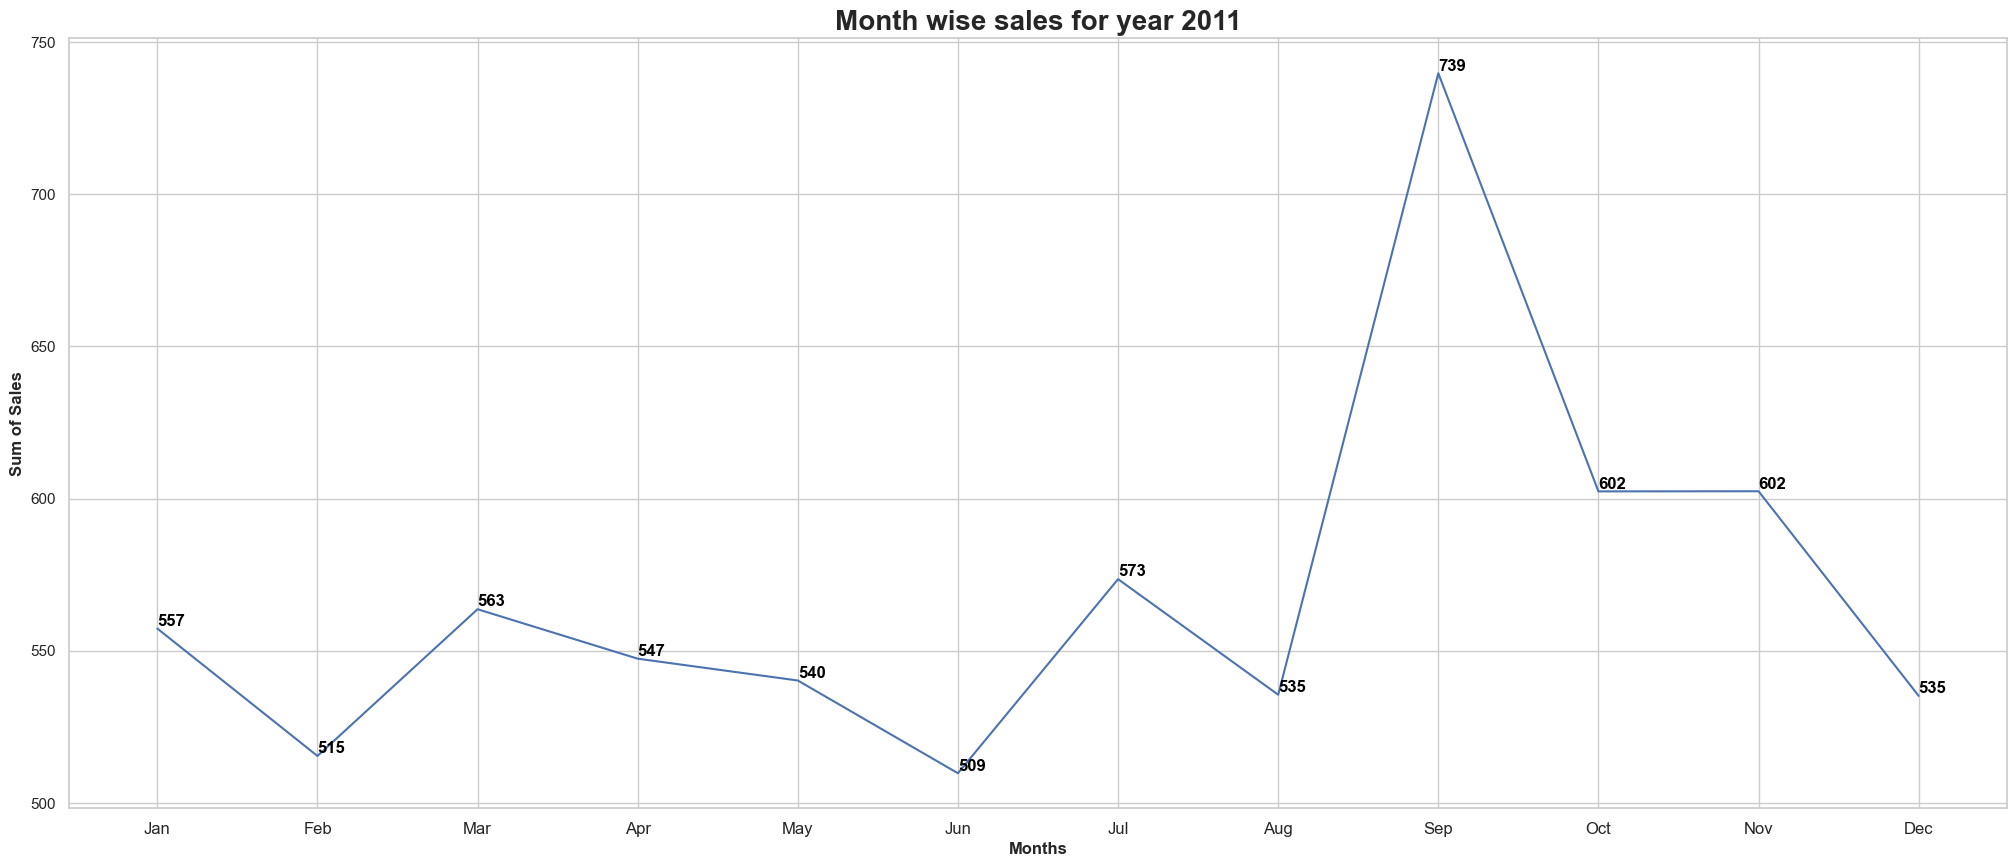

In [174]:
sns.set(style='whitegrid')
plt.figure(figsize=(25,10))
ax= sns.lineplot(data= month_df[month_df['InvoiceDate'].dt.year == 2011], x=month_df['InvoiceDate'].dt.month, y= 'Sales', ci=None, palette=['green'])
plt.xlabel('Months',fontweight='bold')
plt.ylabel('Sum of Sales',fontweight='bold')
plt.title('Month wise sales for year 2011', fontweight='bold', fontsize= 20)
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=np.arange(1, 13), labels=month_names,fontsize=12)
for line in ax.lines:
    x_data, y_data = line.get_xdata(), line.get_ydata()
    for x, y in zip(x_data, y_data):
        ax.text(x, y, f'{int(y):,}', ha='left', va='bottom', fontsize=12, fontweight='bold', color='black')



#### Observations
- The sales has a overall decreasing trend from the month of January till August
- There is a sudden rise in the sales from August to September. This rise is probably due to school opening season in a lot of countries
- The sales is constant from October to November and then there is a fall from November to December.
- No rise in sales from October to November and fall from November to December is surprising as

    this is a festive season all over the world and people tend to shop more during this season.

Visualizing top 10 customers by amount of sales

In [175]:
customers = df.groupby('CustomerID')['Sales'].sum().sort_values(ascending=False).reset_index()

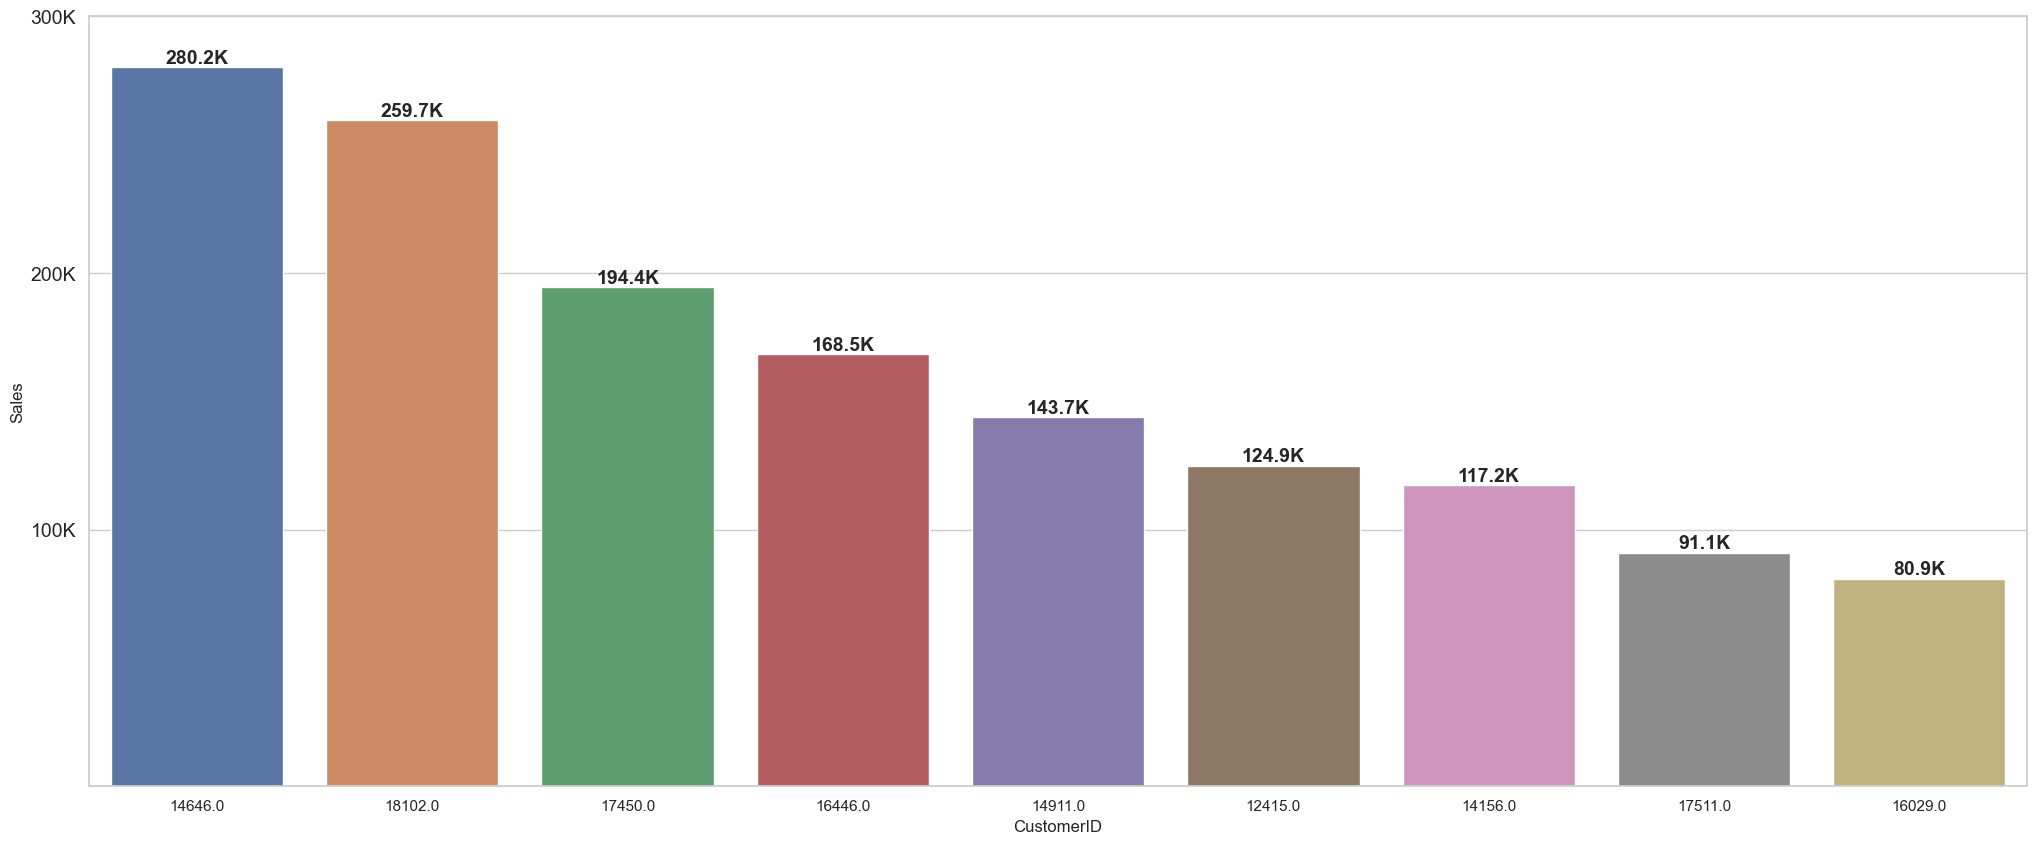

In [182]:
plt.figure(figsize=(25,10))
ax= sns.barplot(data=customers[customers != 'nan'].head(10), x='CustomerID', y='Sales')
plt.yticks(np.arange(100000,400000,100000),labels=[f'{int(i/1000)}K' for i in np.arange(100000,400000,100000)],fontsize=14)
for p in ax.patches:
    value = p.get_height() / 1000  # Divide the height by 1,000 to display in thousands
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{value:.1f}K', ha='center', va='bottom',
            fontsize=14, fontweight='bold')

#### Observations
- Top 10 customers have been identified 

## Final Inferences
- Sales generated by United Kingdom is the highest. The countires that follow UK have much lower sales
    - The company should keep its strong hold in UK. It seems to be having a strong customer base here and efforts should be taken to maintain the same
- The countries that follow UK are Netherlands, Eire, Germany and France.
    - The demand for products is higher in these countries too and company must make efforts to increase the level of demand and trust to as high as UK
- Saudi Arabia, Bahrain, Chez Republic and South Africa are the countries where the sales genertaed is negligible.
    - As the sales are least in these countries, there is a tremendous scope for improvement. Since the company has shown a huge sales in UK,

        that can be replicated in these countries too by following a carefully curated strategy
- "Dotcom Postage" is the highest selling product sales wise followed closely by "Regency Cakestand-3 tier"
    - These two products generate the higher sales for the company and their popularity should be maintained.
- "Hen House" and "Pads to match all cushions" are the worst selling products(sale wise).
    - If the company is sure of the quality of these products, the marketing strategy needs to be reviewed else the products should be discontinued
- The sales is constant from October to November and then there is a fall from November to December.
    - No rise in sales from October to November and fall from November to December is surprising as this is a festive season all over the world and
    
         people tend to shop more during this season. This indicates that customers trust other stores more than the one at hand or marketing strategy is not upto the mark.
    - There is a great scope of improvement.
- Top ten customers have been identified
    - Company can reward them in the form of redeemable reward points, vouchers, discounts etc. to ensure that the loyal customers remain loyal

## Final Observations and Recommendations

    - Sales Analysis by Country:
        The United Kingdom (UK) stands out as the highest revenue-generating country, with significantly higher sales than other countries.
        Recommendations:
            Maintain a strong presence and focus on customer retention in the UK market.
            Explore strategies to replicate UK's success in other high-potential countries like Netherlands, Eire, Germany, and France.

    - Underperforming Markets:
        Countries like Saudi Arabia, Bahrain, Czech Republic, and South Africa exhibit very low sales.
        Recommendations:
            Identify the reasons behind the poor performance in these countries.
            Develop tailored strategies to increase sales and build trust in these untapped markets.

    - Product Sales Analysis:
        "Dotcom Postage" and "Regency Cakestand-3 tier" are top-performing products in terms of sales.
        "Hen House" and "Pads to match all cushions" have the lowest sales.
        Recommendations:
            Maintain the popularity of high-selling products.
            Reevaluate marketing and quality strategies for low-selling products or consider discontinuing them.

    - Seasonal Sales Trend:
        Sales are constant from October to November and decline from November to December, which is unexpected during the festive season.
        Recommendations:
            Investigate the reasons for this decline and reevaluate marketing strategies.
            Capitalize on the festive season to boost sales and customer trust.

    - Top Customers Identification:
        The top ten customers have been identified.
        Recommendations:
            Implement customer loyalty programs such as reward points, vouchers, and exclusive discounts to retain and reward these valuable customers.



### These observations and recommendations are meant to provide valuable insights to the company to optimize its sales strategies, expand into underperforming markets, and maintain strong customer relationships.